# Sustainability Assurance Case Study

As part of the course "Sustainability Reporting Standards and Assurance" we were tasked to conduct an assurance case study. The fictional company was called "4 airlines" and they were preparing a sustainability report. As students we were put in a role of an assruance team and were asked to perform an analysis of each of the eight findings presented in the following section and show their impact upon the audit conclusion according to ISAE 3000, provided that the materiality and the tolerable error are kept at the level determined in the planning stage. 

## Task 1: Transition to low carbon business

4-Airlines has ambitious climate protection goals. It aims to cut its net carbon emissions from flight 
operations by 50% until 2030, compared to 2019, and to achieve carbon neutrality by 2050. Following 
information on the fuel consumption of the company during the last five years is available: 


The team discovered some inconsistencies concerning the cut-off allocation of consumption and pas
senger kilometres, for the period December 2023 – January 2024. After some recalculations, the man
agement of 4 Airlines intends to adjust the specific CO2 emissions as presented for 2023, from 8.58 
Kg/100 pkm to 9.28 Kg/100 pkm. 
19 
4-Airlines Report - December 2023

### Our task: 
Debate within your group whether this adjustment is justified, considering possible 
correlations between the data in Table 3.  

Let's start by making a correlation table for the CO2 emissions:

In [8]:
import pandas as pd

years = [2019, 2020, 2021, 2022, 2023]
fuel_tonnes = [7826493, 2630596, 3243560, 5463438, 6338555]
fuel_per_100pkm = [3.75, 4.25, 4.15, 3.65, 3.58]
co2_per_100pkm = [9.68, 11.04, 10.67, 9.45, 8.58]
saf_reduction = [20321, 7871, 15231, 31545, 32722]

emissions_df = pd.DataFrame({
    'Fuel_Tonnes': fuel_tonnes,
    'Fuel_l_per_100pkm': fuel_per_100pkm,
    'CO2_kg_per_100pkm': co2_per_100pkm,
    'CO2_Reduced_via_SAF': saf_reduction
})
correlation_matrix = emissions_df.corr()
print(correlation_matrix)

                     Fuel_Tonnes  Fuel_l_per_100pkm  CO2_kg_per_100pkm  \
Fuel_Tonnes             1.000000          -0.847507          -0.780569   
Fuel_l_per_100pkm      -0.847507           1.000000           0.966108   
CO2_kg_per_100pkm      -0.780569           0.966108           1.000000   
CO2_Reduced_via_SAF     0.648643          -0.947181          -0.939802   

                     CO2_Reduced_via_SAF  
Fuel_Tonnes                     0.648643  
Fuel_l_per_100pkm              -0.947181  
CO2_kg_per_100pkm              -0.939802  
CO2_Reduced_via_SAF             1.000000  


We can see that there are some really strong correlations in the data. The strongest positive one is between fuel consumption per passenger and 
CO₂ per passenger, suggesting it is the best predictor for estimating the 2023 numbers. 

For further analysis, let's visualise the relationships between fuel consumption and CO2 emissions  by creating a scatterplot and a regression line. We are aware that 4 datapoints is not perfect for a regression but that is the only data we were provided. 

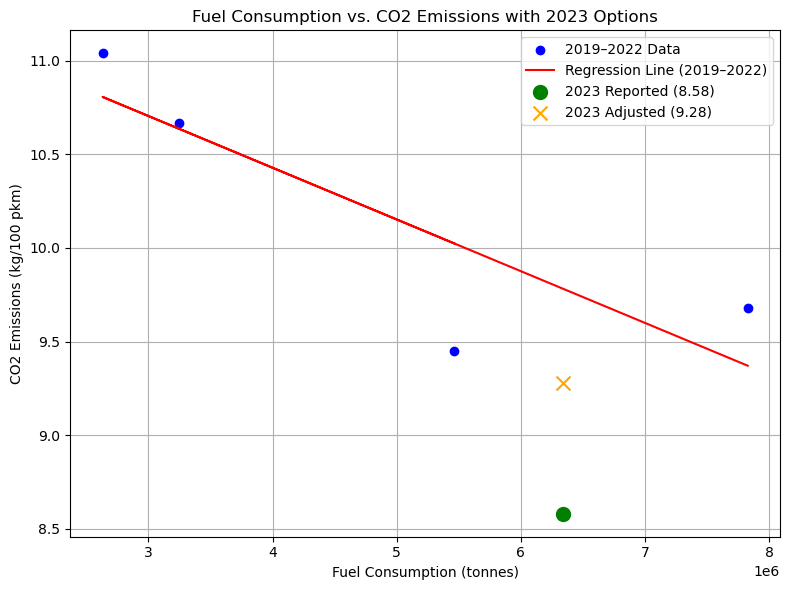

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define data for 2019–2022
fuel_2019_2022 = [7826493, 2630596, 3243560, 5463438]
co2_2019_2022 = [9.68, 11.04, 10.67, 9.45]

# Define 2023 fuel and both CO2 values
fuel_2023 = 6338555
co2_2023_reported = 8.58
co2_2023_adjusted = 9.28

# Create regression line for 2019–2022
fit = np.polyfit(fuel_2019_2022, co2_2019_2022, deg=1)
fit_fn = np.poly1d(fit)

# Generate scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(fuel_2019_2022, co2_2019_2022, color='blue', label='2019–2022 Data')
plt.plot(fuel_2019_2022, fit_fn(fuel_2019_2022), color='red', label='Regression Line (2019–2022)')

# Add 2023 points
plt.scatter(fuel_2023, co2_2023_reported, color='green', label='2023 Reported (8.58)', marker='o', s=100)
plt.scatter(fuel_2023, co2_2023_adjusted, color='orange', label='2023 Adjusted (9.28)', marker='x', s=100)

# Labels and legend
plt.xlabel('Fuel Consumption (tonnes)')
plt.ylabel('CO2 Emissions (kg/100 pkm)')
plt.title('Fuel Consumption vs. CO2 Emissions with 2023 Options')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


We see that the adjustet variable is located nearer to the trend line, therefore suggesting that the new variable might be more correct then the old reported number. Let's finally use some mathematical methods to confirm our assumption

Let's start by calculating CO2 emissions per litre

In [26]:
emissions_df['CO2_per_Litre'] = emissions_df['CO2_kg_per_100pkm'] / emissions_df['Fuel_l_per_100pkm']
print(emissions_df['CO2_per_Litre'])

0    2.581333
1    2.597647
2    2.571084
3    2.589041
4    2.396648
Name: CO2_per_Litre, dtype: float64


CO2 emissions per litre should typiclly lay between 2,5 and 2,6 kg CO₂ per litre for aviation fuel. For 2023, the reported value is ~2.40, which is noticeably lower than previous years (which are all above 2.57). 

In [ ]:
Calculating the Z_score:

In [30]:
from scipy.stats import zscore
emissions_df['CO2_Emissions_Zscore'] = zscore(emissions_df['CO2_kg_per_100pkm'])
emissions_df['CO2_Emissions_Zscore']

0   -0.231444
1    1.311518
2    0.891741
3   -0.492386
4   -1.479428
Name: CO2_Emissions_Zscore, dtype: float64

2023 has a Z-score of -1.48, the lowest in the data set, indicating it is a statistical outlier.  This further supports that 8.58 is abnormally low, making the adjusted value (9.28) statistically more consistent with the trend.

### Conlussion

The adjustment of the 2023 CO₂ emissions value from 8.58 kg/100 pkm to 9.28 kg/100 pkm appears justified. The originally reported figure results in an unusually low CO₂-per-litre emission factor (~2.40 kg/L), which is inconsistent with both industry benchmarks (2.5–2.6 kg/L) and 4-Airlines’ historical data.

Furthermore, anomaly detection using Z-score analysis indicates that the original value is a statistical outlier, deviating significantly from the established trend between 2019–2022. In contrast, the adjusted value aligns closely with regression projections and maintains the integrity of reported environmental performance.